<!-- LANGUAGE TRANSLATER USING SEQ2SEQ ARCHITECHTURE -->
NAME   : PRAVEEN SUNKARA
REGNO : 21BCE9477

The below code is the DEEP LEARNING PROJEC on Language Translater using
Seq2Seqa(Sequence-to-Sequence) architechture where here LSTM(Long Short Term Memory) model is used as a buiding block of RNN, which as the capabilities to solve sequence based problems and learning long term dependencies.



In [1]:
!pip install pandas
!pip install matplotlib
!pip install tensorflow
from tensorflow import keras
!pip install Keras-Preprocessing
import numpy
from numpy import array


In [2]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras_preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth',200)

In [3]:
data_path = "C:/Users/prave/OneDrive/Desktop/fastrack(3-1)/deepLearnign - C1/projects/fra-eng/fra.txt"
with open(data_path,'r', encoding='utf-8') as f:
  lines = f.read()

# lines

In [4]:
# split a text into sentences
def to_lines(text):
  sents = text.strip().split('\n')
  sents = [i.split('\t') for i in sents]
  return sents

In [5]:
fra_eng = to_lines(lines)
fra_eng[:5]


[['Go.',
  'Va !',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)'],
 ['Go.',
  'Marche.',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8090732 (Micsmithel)'],
 ['Go.',
  'En route !',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8267435 (felix63)'],
 ['Go.',
  'Bouge !',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #9022935 (Micsmithel)'],
 ['Hi.',
  'Salut !',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #509819 (Aiji)']]

In [6]:
fra_eng = array(fra_eng)
fra_eng[:5]

array([['Go.', 'Va !',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)'],
       ['Go.', 'Marche.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8090732 (Micsmithel)'],
       ['Go.', 'En route !',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8267435 (felix63)'],
       ['Go.', 'Bouge !',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #9022935 (Micsmithel)'],
       ['Hi.', 'Salut !',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #509819 (Aiji)']],
      dtype='<U349')

In [7]:
# to know the shape of the dataset
fra_eng.shape

(217975, 3)

In [13]:
# here were considering 900000 examples only

fra_eng = fra_eng[:100000,:]


In [14]:
fra_eng = fra_eng[:,[0,1]]
fra_eng[:5]

array([['go', 'va '],
       ['go', 'marche'],
       ['go', 'en route '],
       ['go', 'bouge '],
       ['hi', 'salut ']], dtype='<U349')

In [15]:
#clean the the data by removing special characters and punctuations
#remove punctuation

fra_eng[:,0] = [s.translate(str.maketrans('','',string.punctuation)) for s in fra_eng[:,0]]
fra_eng[:,1] = [s.translate(str.maketrans('','',string.punctuation)) for s in fra_eng[:,1]]
fra_eng[:5]

array([['go', 'va '],
       ['go', 'marche'],
       ['go', 'en route '],
       ['go', 'bouge '],
       ['hi', 'salut ']], dtype='<U349')

In [16]:
#conver text to lowercase

for i in range(len(fra_eng)):
  fra_eng[i,0] = fra_eng[i,0].lower()
  fra_eng[i,1] = fra_eng[i,1].lower()
fra_eng

array([['go', 'va '],
       ['go', 'marche'],
       ['go', 'en route '],
       ...,
       ['its really not that hard', 'ce nest vraiment pas si difficile'],
       ['its really not that much', 'ce nest vraiment pas beaucoup'],
       ['its really very annoying', 'cest vraiment très ennuyeux']],
      dtype='<U349')

Text to Sequence Conversion (word to index mapping)

1. convert senteces into numbers
2. every sentence should be of same length
3. then convert the translated sequence to text again.


In [18]:
#funtion to build a tekeniser

def tokenization(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

#prepare english tokenizer
eng_tokenizer = tokenization(fra_eng[:,0])
eng_vocab_size = len(eng_tokenizer.word_index)+1

eng_length = 8
print('English vocabulary size: %d' % eng_vocab_size)


English vocabulary size: 8342


In [20]:
#prapare French tokenizer

fra_tokenizer = tokenization(fra_eng[:,1])
fra_vocab_size = len(fra_tokenizer.word_index) + 1

fra_length = 8
print('french vocabulary size: %d' % fra_vocab_size)

french vocabulary size: 19665


In [21]:
#encode and pad sequences, padding to maximum sentence length as mentioned above.

def encode_sequences(tokenizer, length, lines):
  #integer encode sequence
  seq = tokenizer.texts_to_sequences(lines)
  #pad sequence with 0 values
  seq = pad_sequences(seq, maxlen=length, padding= 'post')
  return seq

In [22]:
#installing the scilearn library to analysis the lines of the dataset

!pip install scikit-learn

In [23]:
from sklearn.model_selection import train_test_split

#split data into train and 

train,test = train_test_split(fra_eng,test_size=0.2, random_state = 12)


In [24]:
#preparing test data

trainX = encode_sequences(fra_tokenizer, fra_length, train[:,1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:,0])

#preparing validation data

testX = encode_sequences(fra_tokenizer, fra_length, test[:,1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:,0])

In [26]:
#to get the shape of the training and testing arrays

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(72000, 8)
(72000, 8)
(18000, 8)
(18000, 8)


Define our Seq2Seq  model architecture

In [27]:
#build NMT model

def define_model(in_vocab,out_vocab,in_timesteps,out_timesteps,units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dense(out_vocab, activation ='softmax'))
    return model



In [28]:
#we are using the RMSprop optimizer in this model as its usually a good choice when working with
# recurrent nueral network.
#model compilation

model = define_model(fra_vocab_size, eng_vocab_size, fra_length, eng_length, 512)
rms = optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')



In [29]:
#to train the model

history = model.fit(trainX, trainY.reshape(trainY.shape[0],trainY.shape[1],1),epochs =10, batch_size=512, validation_split = 0.2)

Epoch 1/10
113/113 [==============================] - 158s 1s/step - loss: 3.5657 - val_loss: 3.2409
Epoch 2/10
113/113 [==============================] - 162s 1s/step - loss: 3.0246 - val_loss: 2.9683
Epoch 3/10
113/113 [==============================] - 161s 1s/step - loss: 2.7909 - val_loss: 2.7173
Epoch 4/10
113/113 [==============================] - 166s 1s/step - loss: 2.5461 - val_loss: 2.5018
Epoch 5/10
113/113 [==============================] - 162s 1s/step - loss: 2.3378 - val_loss: 2.3482
Epoch 6/10
113/113 [==============================] - 200s 2s/step - loss: 2.1488 - val_loss: 2.1953
Epoch 7/10
113/113 [==============================] - 210s 2s/step - loss: 1.9807 - val_loss: 2.0877
Epoch 8/10
113/113 [==============================] - 206s 2s/step - loss: 1.8310 - val_loss: 1.9765
Epoch 9/10
113/113 [==============================] - 206s 2s/step - loss: 1.6937 - val_loss: 1.8753
Epoch 10/10
113/113 [==============================] - 202s 2s/step - loss: 1.5657 - val_lo

In [ ]:
# preds = model.predict(testX.reshape((testX.shape[0],testX.shape[1])))

#these predictions are sequence of integers.we need to convert these integers corresponding words
#lets define a function

In [30]:
preds = model.predict(testX.reshape((testX.shape[0], testX.shape[1])))
preds = numpy.argmax(preds, axis=-1)


563/563 [==============================] - 33s 53ms/step


In [31]:
# Training the model and obtaining the history object

# Accessing the history object
print(history.history.keys())

# Output the training and validation loss at each epoch
print(history.history['loss'])
print(history.history['val_loss'])



dict_keys(['loss', 'val_loss'])
[3.5656752586364746, 3.0246031284332275, 2.7909328937530518, 2.5461442470550537, 2.33776593208313, 2.1487598419189453, 1.9807499647140503, 1.8310015201568604, 1.6937021017074585, 1.5656955242156982]
[3.240880250930786, 2.968318223953247, 2.717270612716675, 2.501782178878784, 2.348247766494751, 2.195340871810913, 2.087742805480957, 1.9765031337738037, 1.8753365278244019, 1.824169635772705]


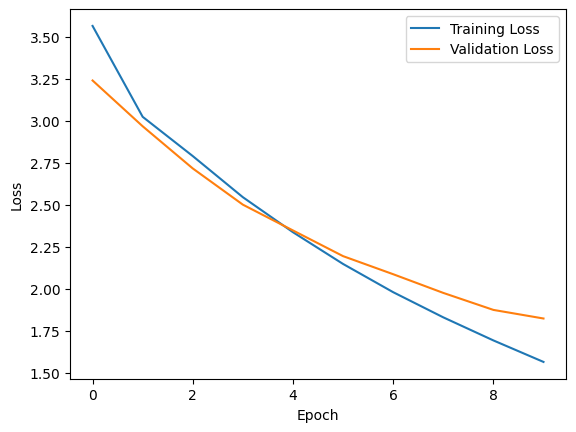

In [32]:
# Plotting the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
            

In [33]:
#to predict the sequences afer training and testin

preds
# preds = preds.astype(int)

array([[  2, 451,  21, ...,   0,   0,   0],
       [ 34, 138,  38, ...,   0,   0,   0],
       [  4, 114, 291, ...,   0,   0,   0],
       ...,
       [  1,  36,   6, ...,   0,   0,   0],
       [ 14, 109,  92, ...,   0,   0,   0],
       [  1,  16,  37, ...,   0,   0,   0]], dtype=int64)

In [34]:
# these prediction are sequences of integers. we need to convert these integers to their corresponding words

def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None


In [35]:
# Converting the predictions into sentences (English);

preds_text = []
for i in preds:
    temp = []  # Initialize the temp list for each sentence
    for j in range(len(i)):
        preds_text = []
        t = get_word(i[j], eng_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if( t == None):
                temp.append('')
            else:
                temp.append(t)
                
    preds_text.append(' '.join(temp))


In [37]:
# preds_text = eng_tokenizer.sequences_to_texts(preds)


In [40]:
pred_df = pd.DataFrame({'actual': test[:,0], 'predicted' : preds_text})

In [41]:
#print 25 rows randomly
pred_df.sample(15)

,actual,predicted
12001,can i have some more tea,can i use the
1529,all of us make mistakes,we all all
3661,i cant carry a tune,i cant know to
15449,were not so confident,were not not
2166,my boss is very strict,my friend is very
9305,i heard a mans voice,i heard a a
196,are you enjoying this,this it
8072,bring me the flute,give me the phone
15660,do you have a corkscrew,do you have a
15729,i thought theyd heard us,i thought you were
